# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('iawe.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,13)),
                        'Meters': ['Medidor Princ.','M2', 'M.Fridge', 'M.AA', 'M.AA', 'M.Washing machine.','Computer','Clothes iron','unknown','tv','wet appliance','motor']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2013-05-24 05:30:00+05:30', end='2013-05-24 07:13:35+05:30', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2013-05-24 05:30:00+01:00' #tiempo inicial
tb = '2013-09-18 12:58:00+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity              power                 current      power
type                        apparent      reactive               active
2013-05-24 10:00:00+05:30  22.692671  6.000030e-18  0.095233  11.139330
2013-05-24 10:00:10+05:30  21.761490  6.000030e-18  0.091270  10.492930
2013-05-24 10:00:20+05:30  22.039511  6.000030e-18  0.092401  10.587800
2013-05-24 10:00:30+05:30  21.285959  6.000030e-18  0.089214  10.384950
2013-05-24 10:00:40+05:30  21.692209  6.000030e-18  0.090912  10.765520
...                              ...           ...       ...        ...
2013-08-05 21:02:30+05:30  27.105490  6.000030e-18  0.111997  14.904545
2013-08-05 21:02:40+05:30  26.747633  6.000030e-18  0.110538  14.908183
2013-08-05 21:02:50+05:30  26.855419  6.000030e-18  0.110995  14.947820
2013-08-05 21:03:00+05:30  26.777824  6.000030e-18  0.110665  14.929925
2013-08-05 21:03:10+05:30  26.736681  6.000030e-18  0.110462  14.915501

[634700 rows x 4 columns]

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2013-05-24 05:30:00+01:00' #tiempo inicial
tb = '2013-09-18 12:58:00+01:00' #tiempo final
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity            power                            current
type                        active      reactive   apparent          
2013-05-24 10:00:00+05:30  11.3834  6.000030e-18  22.753700  0.095527
2013-05-24 10:00:10+05:30  10.4745  6.000030e-18  21.792801  0.091420
2013-05-24 10:00:20+05:30  10.4771  6.000030e-18  22.254499  0.093321
2013-05-24 10:00:30+05:30  10.3995  6.000030e-18  21.227800  0.088972
2013-05-24 10:00:40+05:30  10.4146  6.000030e-18  21.397800  0.089681
...                            ...           ...        ...       ...
2013-08-05 21:02:30+05:30  14.8985  6.000030e-18  26.413799  0.109131
2013-08-05 21:02:40+05:30  14.8993  6.000030e-18  26.996500  0.111557
2013-08-05 21:02:50+05:30  14.9530  6.000030e-18  26.809401  0.110803
2013-08-05 21:03:00+05:30  14.9581  6.000030e-18  26.812901  0.110816
2013-08-05 21:03:10+05:30  14.8999  6.000030e-18  26.733601  0.110467

[634700 rows x 4 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

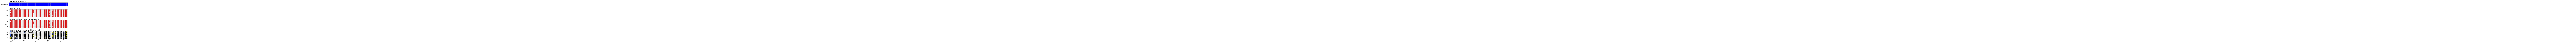

In [6]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2013-05-24 05:30:00+01:00' #tiempo inicial
tb = '2013-09-18 12:58:00+01:00' #tiempo final

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [5]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

1/10 ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])

10/10 ElecMeter(instance=11, building=1, dataset='iAWE', appliances=[Appliance(type='wet appliance', instance=1)])

(2, 1, iAWE)     1005.572775
(3, 1, iAWE)       82.958385
(4, 1, iAWE)      203.569523
(5, 1, iAWE)      203.889213
(7, 1, iAWE)       24.351512
(10, 1, iAWE)      11.495919
Name: active, dtype: float64

Vemos  el top-k entre los dispositivos electricos conectados

In [6]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

1/10 ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])

10/10 ElecMeter(instance=11, building=1, dataset='iAWE', appliances=[Appliance(type='wet appliance', instance=1)])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])
  ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [9]:
train = DataSet('iawe.h5')


train.set_window(start="2013-05-24 05:30:00", end="2013-07-24 05:30:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2013-05-24 05:30:00+05:30', end='2013-07-24 05:30:00+05:30', empty=False)

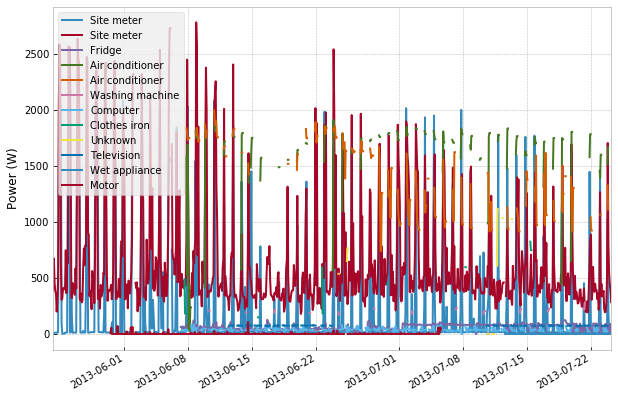

In [10]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [7]:
 #Validación 

valid = DataSet('iawe.h5')

#valid.set_window(start="2013-07-24 05:30:00", end="2013-08-24 05:30:00")
valid.set_window(start="2013-07-24 05:30:00", end="2013-08-01 05:30:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2013-07-24 05:30:00+05:30', end='2013-08-01 05:30:00+05:30', empty=False)

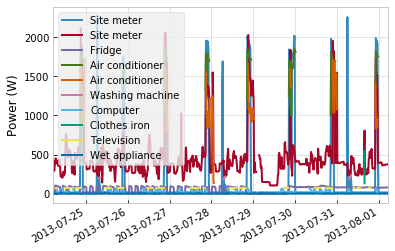

In [8]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [9]:
test = DataSet('iawe.h5') #Pruebas

#valid.set_window(start="2013-07-24 05:30:00", end="2013-08-24 05:30:00")

test.set_window(start="2013-08-01 05:30:00", end="2013-09-18 05:30:00")


#test.set_window(start="2013-08-24 05:30:00", end="2013-09-18 08:40:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2013-08-01 05:30:00+05:30', end='2013-09-18 05:30:00+05:30', empty=False)

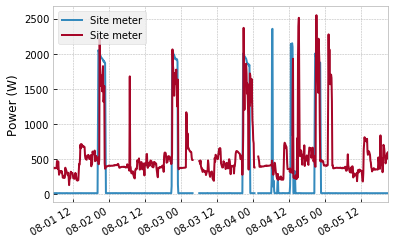

In [10]:
test_elec.mains().plot()